# Action d'un filtre sur un signal périodique, épisode III

## Nouvel ingrédient: comment faire une transformée de Fourier

On va voir dans cet épisode comment faire une transformée de Fourier par nous-même. Pour ce faire, on a besoin d'un signal `signal` échantillonné de manière régulière. On va faire appel aux routines 
* `np.fft.rfft(signal, norm = 'forward')` pour faire la transformée de Fourier rapide (Fast Fourier Transform) pour un signal réel (d'où le «r» de départ). La normalisation est nécessaire pour que l'on puisse interpréter facilement le spectre en amplitude, mais il faudra encore corriger d'un facteur 2 lors du passage à `np.abs` (voir plus bas)
* `np.fft.irfft(FFT, norm = 'forward')` pour sa transformée inverse à partir de la FFT précédente. Il faut bien préciser la même convention de normalisation que la transformée directe.
* `np.fft.rfftfreq(n, Te)` pour accéder aux fréquences en donnant le nombre de points `n` et l'intervalle de temps `Te` entre deux points
Entre les deux, on pourra appliquer une fonction de transfert afin de voir l'effet d'un filtre.

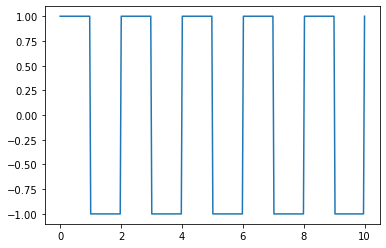

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Construction d'un signal carré de période 2 seconde (donc f0 = 0.5Hz)
t = np.linspace(0, 10, 300)
signal = np.array([(-1)**(int(ti)) for ti in t])

# Si on veut tester avec un simple signal sinusoïdal: 
# décommenter la ligne suivante
#signal = 3 * np.cos(2*np.pi*t)

plt.plot(t, signal)

Text(0.5, 0, 'Fréquence en Hz')

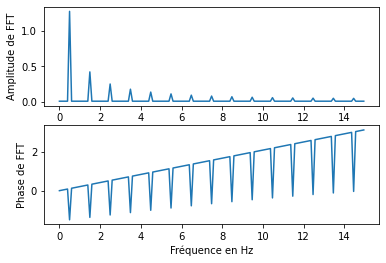

In [25]:
# Maintenant qu'on a le signal, on peut faire sa transformée de Fourier

Te  = t[1] - t[0] # Temps entre deux points consécutifs
n = len(signal)   # Nombre de points présents dans le signal

# La FFT proprement dite: attention à la normalisation: 'forward' est
# *presque* celle du physicien
FFT = np.fft.rfft(signal, norm = 'forward') 
freqs = np.fft.rfftfreq(n, Te)

# La FFT est un ensemble de valeurs complexes. 
# Si on veut le spectre en amplitude, il faut passer par le module
# donné par np.abs et multiplier par 2 pour interpréter directement
# en terme d'amplitude de signal sinusoïdal à sommer.
# La phase est donnée par np.angle

amplitude = np.abs(FFT) * 2   # *2 pour l'interprétation
phase = np.angle(FFT)

plt.subplot(211) # 2 lignes, 1 colonne, premier subplot
plt.plot(freqs, amplitude)
plt.ylabel('Amplitude de FFT')
plt.subplot(212) # 2 lignes, 1 colonne, second subplot
plt.plot(freqs, phase)
plt.ylabel('Phase de FFT')
plt.xlabel('Fréquence en Hz')


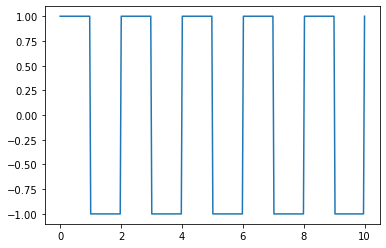

In [26]:
# Faisons la transformée inverse 
# (attention à bien prendre la même normalisation qu'avant)
signal_retour = np.fft.irfft(FFT, norm = 'forward')

plt.plot(t, signal_retour)

## Votre travail: appliquer un filtrage sur la FFT

Maintenant qu'on a ces outils, vous pouvez les utiliser pour appliquer une certaine fonction de transfert (directement en complexes) sur la FFT (déjà complexe!) et faire la transformée inverse pour voir l'effet sur le signal de départ. En résumé, dans le bloc de code suivant:
* on importe pour vous le signal (carré) dans la variable `signal` avec les temps `t` correspondant ainsi que la fonction de transfert `H(f)` 
* vous pouvez appliquer la fonction `np.fft.rfft` sur votre signal
* récupérez aussi les fréquences correspondantes avec la fonction `np.fft.rfftfreq` car on en a besoin au point suivant
* multipliez la FFT par la fonction de transfert `H` appliquée sur les fréquences en question
* et finalement appliquez la fonction `np.fft.irfft` pour obtenir la transformée inverse.

Il ne reste alors plus qu'à faire une représentation graphique pour observer qu'un filtre passe-bas utilisé à haute fréquence se comporte comme un intégrateur et donc transforme un signal carré en signal triangulaire.

On vous demande aussi de mettre dans la variable `reponse` (SANS ACCENT) l'amplitude du signal triangulaire (maximum moins minimum le tout divisé par deux).


In [30]:
# Import de `signal`, `t` et `H`
from donnees import *

# À vous de jouer



# Le petit graphique pour visualiser l'effet


# La réponse attendue
reponse = 'amplitude du signal triangulaire de sortie'